<center>
    
    COMP4240/5435 - Reinforcement Learning
    
# Homework 5 - Temporal Difference

    
</center>

Student Name: Bongwoo Jeon 

The purpose of this project is to study different properties of Temporal Difference methods.  

**General Notes:**
- Questions marked with * are optional for COMP4240 - Undergraduate section. Questions marked as extra credit are optional for everyone. This homework does not include a separate extra credit question. However, students in COMP4240 can gain some extra credits by solving the last part.
- Do not use a mix of python lists and numpy arrays. Every vector or matrix in your code should be a numpy array. 
- For functions that exist in both the python core and the numpy library, use the one in the numpy library. For example, use `np.max` instead of `max`. Another example: use `np.random.normal` instead of `random.gauss`.
- Make sure all of your plots have a proper size and include `xlabel`, `ylabel`, `legend`, `title`, and `grid`.

In [1]:
# You are allowed to use the following modules
import numpy as np
import gym
import matplotlib.pyplot as plt


## Using Cliff Walking from gym

**Description**

The board is a 4x12 matrix, with (using NumPy matrix indexing):

- `[3, 0]` as the start at bottom-left
- `[3, 11]` as the goal at bottom-right
- `[3, 1..10]` as the cliff at bottom-center

If the agent steps on the cliff, it returns to the start. An episode terminates when the agent reaches the goal.
Actions

**Action**

There are 4 discrete deterministic actions:

- 0: move up
- 1: move right
- 2: move down
- 3: move left

**Observations**

There are 3x12 + 1 possible states. In fact, the agent cannot be at the cliff, nor at the goal (as this results in the end of the episode). It remains all the positions of the first 3 rows plus the bottom-left cell. The observation is simply the current position encoded as flattened index.

**Reward**

Each time step incurs -1 reward, and stepping into the cliff incurs -100 reward.

**Setting the environment**


In [2]:
env = gym.make('CliffWalking-v0')

#or if you get a warning use this instead 

# env = gym.make('CliffWalking-v0', new_step_api=True)

observation, info = env.reset()
print(f'initial state: {observation}')
for _ in range(5):
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    print(f'action: {action}, next_state: {observation}, reward: {reward}')

env.close()

initial state: 36
action: 2, next_state: 36, reward: -1
action: 1, next_state: 36, reward: -100
action: 1, next_state: 36, reward: -100
action: 1, next_state: 36, reward: -100
action: 2, next_state: 36, reward: -1


## Part I

**(a)** Implement SARSA (on-policy TD control) using $\varepsilon$–greedy policy with parameters $\varepsilon=0.1$ and $Q_0 (s,a)=0$ for all $s,a$. Apply your implementation to the undiscounted cliff walking task for 50 independent runs where each run includes 500 episodes. For the last episode use `render_mode='human'` to watch the agent's learned behavior. You do not need to include this in the report. However, this is a good way of checking on the agent's learning progress a few times during the learning process.


**(b)** Implement Q-learning (off-policy TD control) using $\varepsilon$–greedy policy with parameters $\varepsilon=0.1$ and $Q_0 (s,a)=0$ for all $s,a$. Apply your implementation to the undiscounted cliff walking task. Apply your implementation to the undiscounted cliff walking task for 50 independent runs where each run includes 500 episodes. For the last episode use `render_mode='human'` to watch the agent's learned behavior. You do not need to include this in the report. However, this is a good way of checking on the agent's learning progress a few times during the learning process.


**(c)** Make sure both algorithms use the same parameters (e.g., $\varepsilon$, $\alpha$). Plot sum of rewards during episode over the number of episodes for both algorithms by averaging the results over the 50 runs. Both plots should be shown in one figure for comparison.


**(d)** Print the optimal policy for each algorithm. This should be a matrix of size 4x12 with elements indicating optimal actions (either use 'U', 'D', 'R', 'L' or print corresponding arrows).


**(e)** Re-run the whole experiment, this time by using a decaying $\varepsilon$. Plot sum of rewards during espisode over the number of episodes. Print the optimal policies.


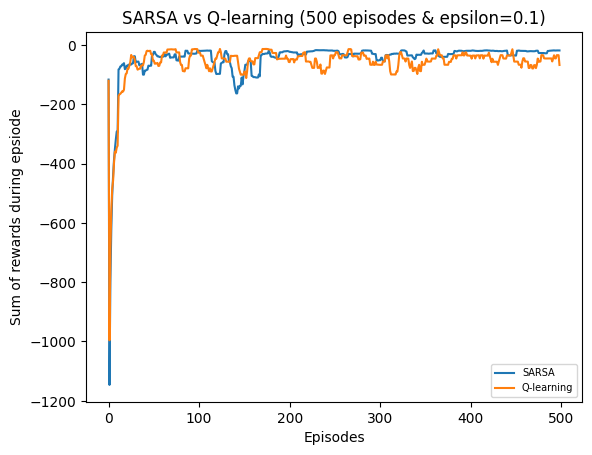

Optimal policy of SARSA of 500 episodes & epsilon=0.1:
[['→' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←']
 ['←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←']
 ['←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←']
 ['←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←']]


Optimal policy of Q-learning of 500 episodes & epsilon=0.1:
[['↓' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←']
 ['←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←']
 ['←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←']
 ['←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←']]




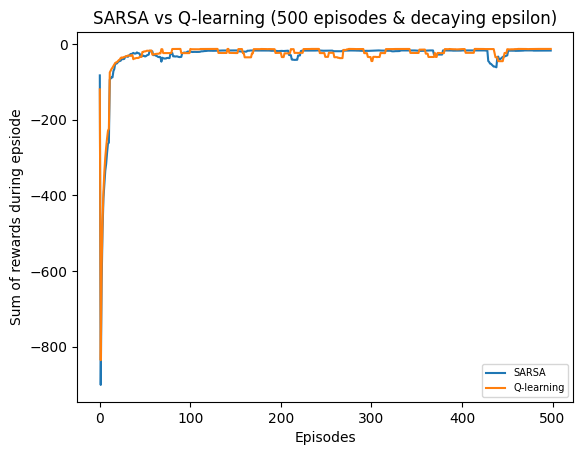

Optimal policy of SARSA of 500 episodes & decaying epsilon:
[['→' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←']
 ['←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←']
 ['←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←']
 ['←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←']]


Optimal policy of Q-learning of 500 episodes & decaying epsilon:
[['←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←']
 ['←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←']
 ['←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←']
 ['←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←' '←']]




In [12]:
#--- Your code here ---#
def SARSA(env, n_episode, alpha, gamma, epsilon, decay):
    
    for i in range(1, 51):
    
        sum_reward = np.zeros(n_episode)
        Q = np.zeros((env.observation_space.n, env.action_space.n))
        
        if decay == True:
            epsilon = 1.0 / i

        for episode in range(n_episode):

            # if episode == n_episode - 1:
            #     env = gym.make('CliffWalking-v0', render_mode='human')

            S, info = env.reset()

            if np.random.rand() < epsilon:
                A = env.action_space.sample()
            else:
                A = np.argmax(Q[S])

            terminated = False

            while not terminated:
                next_S, R, terminated, truncated, info = env.step(A)
                if np.random.rand() < epsilon:
                    next_A = env.action_space.sample()
                else:
                    next_A = np.argmax(Q[next_S])
                Q[S][A] += alpha * (R + gamma * Q[next_S][next_A] - Q[S][A])

                S = next_S
                A = next_A

                sum_reward[episode] += R

    return Q, sum_reward


def Q_learning(env, n_episode, alpha, gamma, epsilon, decay):
    
    for i in range(1, 51):
        
        sum_reward = np.zeros(n_episode)    
        Q = np.zeros((env.observation_space.n, env.action_space.n))
        
        if decay == True:
            epsilon = 1.0 / i

        for episode in range(n_episode):

            # if episode == n_episode - 1:
            #     env = gym.make('CliffWalking-v0', render_mode='human')

            S, info = env.reset()

            terminated = False

            while not terminated:
                if np.random.rand() < epsilon:
                    A = env.action_space.sample()
                else:
                    A = np.argmax(Q[S])

                next_S, R, terminated, truncated, info = env.step(A)
                Q[S][A] += alpha * (R + gamma * np.max(Q[next_S]) - Q[S][A])

                S = next_S

                sum_reward[episode] += R

    return Q, sum_reward

actions = [u'\u2191', u'\u2192', u'\u2193', u'\u2190']

def print_optimal_policy(Q):
    optimal_policy = np.array([np.argmax(Q[key]) if key in Q else -1 for key in np.arange(48)]).reshape((4,12))
    print(np.take(actions, np.reshape(optimal_policy, (4, 12))))
        

env = gym.make('CliffWalking-v0')

sarsa_value, sarsa_rewards = SARSA(env, n_episode=500, alpha=0.5, gamma=0.9, epsilon=0.1, decay=False)    
q_value, q_rewards = Q_learning(env, n_episode=500, alpha=0.5, gamma=0.9, epsilon=0.1, decay=False)

sarsa_avg_rewards = np.array([np.mean(sarsa_rewards[i-10:i]) if i >= 10 else np.mean(sarsa_rewards[:i]) for i in range(1, len(sarsa_rewards))])
q_avg_rewards = np.array([np.mean(q_rewards[i-10:i]) if i >= 10 else np.mean(q_rewards[:i]) for i in range(1, len(q_rewards))])
    
plt.plot(sarsa_avg_rewards, label="SARSA")
plt.plot(q_avg_rewards, label="Q-learning")
plt.xlabel("Episodes")
plt.ylabel("Sum of rewards during epsiode")
plt.title("SARSA vs Q-learning (500 episodes & epsilon=0.1)")
plt.legend(fontsize=7)
plt.show()
            
print("Optimal policy of SARSA of 500 episodes & epsilon=0.1:")
print_optimal_policy(sarsa_value)
print('\n')
print("Optimal policy of Q-learning of 500 episodes & epsilon=0.1:")
print_optimal_policy(q_value)
print('\n')



sarsa_value, sarsa_rewards = SARSA(env, n_episode=500, alpha=0.5, gamma=0.9, epsilon=0.1, decay=True)
q_value, q_rewards = Q_learning(env, n_episode=500, alpha=0.5, gamma=0.9, epsilon=0.1, decay=True)

sarsa_avg_rewards = np.array([np.mean(sarsa_rewards[i-10:i]) if i >= 10 else np.mean(sarsa_rewards[:i]) for i in range(1, len(sarsa_rewards))])
q_avg_rewards = np.array([np.mean(q_rewards[i-10:i]) if i >= 10 else np.mean(q_rewards[:i]) for i in range(1, len(q_rewards))])

plt.plot(sarsa_avg_rewards, label="SARSA")
plt.plot(q_avg_rewards, label="Q-learning")
plt.xlabel("Episodes")
plt.ylabel("Sum of rewards during epsiode")
plt.title("SARSA vs Q-learning (500 episodes & decaying epsilon)")
plt.legend(fontsize=7)
plt.show()

print("Optimal policy of SARSA of 500 episodes & decaying epsilon:")
print_optimal_policy(sarsa_value)
print('\n')
print("Optimal policy of Q-learning of 500 episodes & decaying epsilon:")
print_optimal_policy(q_value)
print('\n')


Answer the following questions:

a. What value of $\alpha$ did you pick? Why?
> I picked $\alpha$ = 0.5

b. How similar the optimal policies get when you use a decaying $\varepsilon$? Why?
> Just first rows in each optimal poicies are different.




## Part II (*)
Consider the following gridworld with four actions (up, down, right, and left). If the action takes the agent off the gird, the agent stays in the same state. In each non-terminating step, the agent receives a random reward of -12 or +10 with equal probability. The reward for reaching the goal state is +5 and the episode ends when the agent reaches the goal.

Use $\varepsilon$–greedy policy with $\varepsilon(s) = \frac{1}{\sqrt{n(s)}}$ where $n(s)$ is the number of times state $s$ has been visited, assuring infinite exploration in the limit which is a theoretical requirement for the convergence of both **Q-learning** and **Double Q-learning**. 
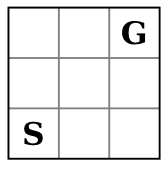

a. Implement **Q-learning** and **Double Q-learning** and apply them to this problem for 10,000 experiments using the learning rate $\alpha=\frac{1}{n(s,a)}$.

b. Plot the average reward per step vs. number of time steps averaged over 10,000 experiments. The length of an episode following the optimal policy is five actions, so the optimal average reward per step is +0.2. Plot this true value in your figure and see how close your algorithm gets to the true value.

c. Plot the maximal action value in the starting state $S$ (i.e. $max_a Q(s,a)$) averaged over 10,000 experiments. The optimal value of maximally valued action in the starting state is $5\gamma^4 - \sum_{k=0}^3 \approx 0.36$. Plot this true value in your figure and see how close your algorithm gets to the true value.

d. Repeat the experiments with $\alpha = \frac{1}{n(s,a)^{0.8}}$ and redo steps b and c.


**Note:** You should have four figures (average rewards and maximal action values for different learning rates, $2 \times 2$). 


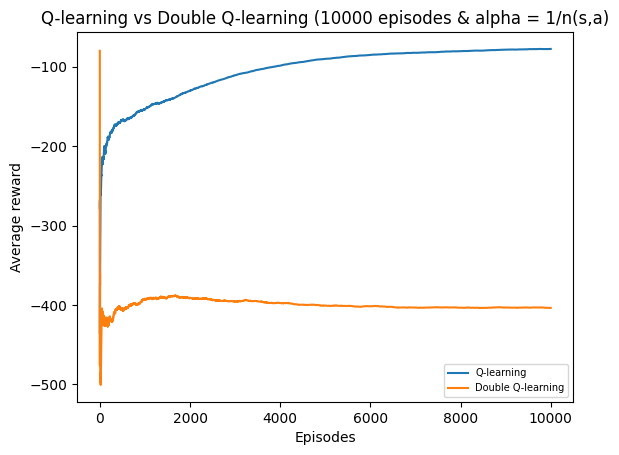

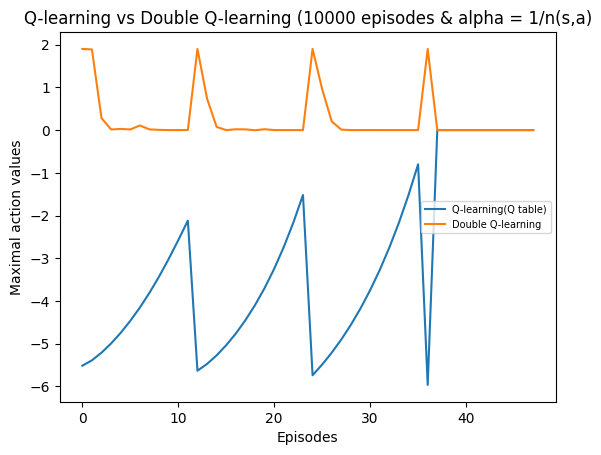

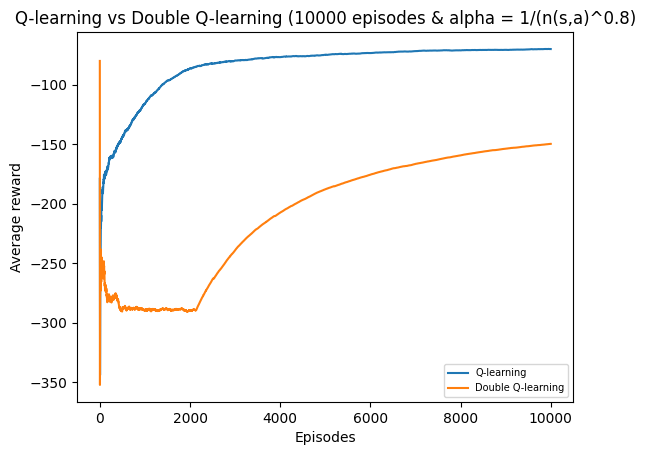

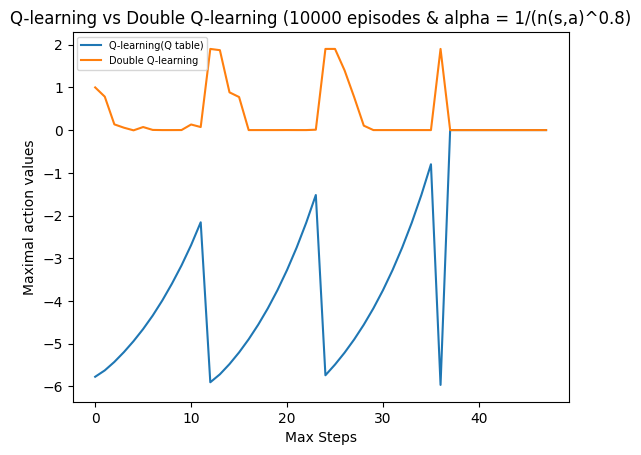

In [21]:
#--- Your code here ---#
def Q_learning(env, n_episode, gamma, exp):
    
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    sum_reward = np.zeros(n_episode)
    epsilon = 1.0 / np.sqrt(env.observation_space.n)
    alpha = 1.0 / ((env.observation_space.n * env.action_space.n) ** exp)
    
    for episode in range(n_episode):
                
        S, info = env.reset()
             
        terminated = False
        t = 0
        
        while t < 100:
            if np.random.rand() < epsilon:
                A = env.action_space.sample()
            else:
                A = np.argmax(Q[S])
            
            next_S, R, terminated, truncated, info = env.step(A)
            
            R += 0.2
            
            Q[S, A] += alpha * (R + gamma * np.max(Q[next_S]) - Q[S, A])
            
            S = next_S
            
            sum_reward[episode] += R
            t += 1
            
            if terminated:
                break
                
    return Q, sum_reward




def Double_Q_learning(env, n_episode, gamma, exp):
    
    Q1 = np.zeros([env.observation_space.n, env.action_space.n])
    Q2 = np.zeros([env.observation_space.n, env.action_space.n])
    sum_reward = np.zeros(n_episode)
    epsilon = 1.0 / np.sqrt(env.observation_space.n)
    alpha = 1.0 / ((env.observation_space.n * env.action_space.n) ** exp)
    
    for episode in range(n_episode):

        S, info = env.reset()
            
        terminated = False
        t = 0
        
        while t < 100:
            
            if np.random.rand() < epsilon:
                A = env.action_space.sample()
            else:
                Q12 = Q1 + Q2
                A = np.argmax(Q12[S])
                
            next_S, R, terminated, truncated, info = env.step(A)
            
            R += 0.2
            
            if np.random.rand() < 0.5:
                Q1[S, A] += alpha * (R + gamma * np.argmax(Q2[next_S]) - Q1[S, A])
            else:
                Q2[S, A] += alpha * (R + gamma * np.argmax(Q1[next_S]) - Q2[S, A])
                
            S = next_S
            
            sum_reward[episode] += R
            t += 1
            
            if terminated:
                break
                
    return Q1, Q2, sum_reward

env = gym.make('CliffWalking-v0')

q_value, q_rewards = Q_learning(env, n_episode=10000, gamma=0.9, exp=1.0)
q1_value, q2_value, dq_rewards = Double_Q_learning(env, n_episode=10000, gamma=0.9, exp=1.0)

q_avg_rewards = np.array([np.mean(q_rewards[i-10000:i]) if i >= 10000 else np.mean(q_rewards[:i]) for i in range(1, len(q_rewards))])
dq_avg_rewards = np.array([np.mean(dq_rewards[i-10000:i]) if i >= 10000 else np.mean(dq_rewards[:i]) for i in range(1, len(dq_rewards))])

plt.plot(q_avg_rewards, label="Q-learning")
plt.plot(dq_avg_rewards, label="Double Q-learning")
plt.xlabel("Episodes")
plt.ylabel("Average reward")
plt.title("Q-learning vs Double Q-learning (10000 episodes & alpha = 1/n(s,a)")
plt.legend(fontsize=7)
plt.show()

mean_q_value = (q1_value + q2_value) / 2

plt.plot(np.max(q_value, axis=1), label="Q-learning(Q table)")
plt.plot(np.max(mean_q_value, axis=1), label="Double Q-learning")
plt.xlabel("Episodes")
plt.ylabel("Maximal action values")
plt.title("Q-learning vs Double Q-learning (10000 episodes & alpha = 1/n(s,a)")
plt.legend(fontsize=7)
plt.show()


q_value, q_rewards = Q_learning(env, n_episode=10000, gamma=0.9, exp=0.8)
q1_value, q2_value, dq_rewards = Double_Q_learning(env, n_episode=10000, gamma=0.9, exp=0.8)

q_avg_rewards = np.array([np.mean(q_rewards[i-10000:i]) if i >= 10000 else np.mean(q_rewards[:i]) for i in range(1, len(q_rewards))])
dq_avg_rewards = np.array([np.mean(dq_rewards[i-10000:i]) if i >= 10000 else np.mean(dq_rewards[:i]) for i in range(1, len(dq_rewards))])

plt.plot(q_avg_rewards, label="Q-learning")
plt.plot(dq_avg_rewards, label="Double Q-learning")
plt.xlabel("Episodes")
plt.ylabel("Average reward")
plt.title("Q-learning vs Double Q-learning (10000 episodes & alpha = 1/(n(s,a)^0.8)")
plt.legend(fontsize=7)
plt.show()

mean_q_value = (q1_value + q2_value) / 2

plt.plot(np.max(q_value, axis=1), label="Q-learning(Q table)")
plt.plot(np.max(mean_q_value, axis=1), label="Double Q-learning")
plt.xlabel("Max Steps")
plt.ylabel("Maximal action values")
plt.title("Q-learning vs Double Q-learning (10000 episodes & alpha = 1/(n(s,a)^0.8)")
plt.legend(fontsize=7)
plt.show()

Answer the following questions:

a.	Which algorithm finds a better policy? Why?
> Q-Learning finds a better policy because Q-Learning learns only one Q table while Double Q-Learning should learn two Q tables.

b.	b.	Which learning rate performs better? 
> $\alpha = \frac{1}{n(s,a)^{0.8}}$ performs better.